<a href="https://colab.research.google.com/github/pungpingg/Customer_segmentation/blob/main/Customer_segmentation_for_groceries_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Customer Segmentation Project (Grocery data set)

In this project, my primary objective is to categorize customers into distinct groups based on their historical interactions with the grocery store. The aim is to scrutinize customer behavior and discern unique patterns within each group. Customer segmentation serves as a valuable tool, empowering the store to enhance sales and optimize marketing expenditures by tailoring campaigns to specific customer segments. <br>


The ultimate goal is to identify and target the most responsive groups, thereby increasing overall efficiency and effectiveness in reaching the intended audience. <br>

*Data source*: [customer-personality-analysis](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis)

There are **5 parts** in this project: <br>
**1)** Import library, import data and understand data (descriptive analysis) <br>
**2)**  Data preprocessing includes cleaning, scaling, and dimension reduction <br>
**3)** Segment customers by using model engineering <br>
**4)** Analyze the deal that customers take <br>
**5)** Conclusion

## Part 1 - Import, understand the data, and cleaning data

In [1]:
from pydrive.auth import GoogleAuth
from google.colab import drive
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans

In [2]:
# import data from google drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1v6ehdN3EgFQMjVLHj9i_MRMNS3DK-Bf0'
#https://drive.google.com/file/d/1v6ehdN3EgFQMjVLHj9i_MRMNS3DK-Bf0/view?usp=drive_link

download = drive.CreateFile({'id': file_id})

# Download the file to a local disc
download.GetContentFile("marketing_campaign.csv")
df_customer  = pd.read_csv("marketing_campaign.csv", delimiter='\t')

In [3]:
df_customer.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In this data set, ***2,240 customers*** is analyzed with 29 attributions. <br>

**People** <br>
1. ID: Customer's unique identifier<br>
2. Year_Birth: Customer's birth year<br>
3. Education: Customer's education level<br>
4. Marital_Status: Customer's marital status<br>
5. Income: Customer's yearly household income<br>
6. Kidhome: Number of children in customer's household<br>
7. Teenhome: Number of teenagers in customer's household<br>
8. Dt_Customer: Date of customer's enrollment with the company<br>
9. Recency: Number of days since customer's last purchase<br>
10. Complain: 1 if the customer complained in the last 2 years, 0 otherwise<br>

**Products** <br>
11. MntWines: Amount spent on wine in last 2 years<br>
12. MntFruits: Amount spent on fruits in last 2 years<br>
13. MntMeatProducts: Amount spent on meat in last 2 years<br>
14. MntFishProducts: Amount spent on fish in last 2 years<br>
15. MntSweetProducts: Amount spent on sweets in last 2 years<br>
16. MntGoldProds: Amount spent on gold in last 2 years<br>

**Promotion**<br>
17. NumDealsPurchases: Number of purchases made with a discount<br>
18. AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise<br>
19. AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise<br>
20. AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise<br>
21. AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise<br>
22. AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise<br>
23. Response: 1 if customer accepted the offer in the last campaign, 0 otherwise<br>


**Place**<br>
24. NumWebPurchases: Number of purchases made through the company’s website<br>
25. NumCatalogPurchases: Number of purchases made using a catalogue<br>
26. NumStorePurchases: Number of purchases made directly in stores<br>
27. NumWebVisitsMonth: Number of visits to company’s website in the last month<br>

**Others**
28. Z_CostContact
29. Z_Revenue


In [4]:
print(f"The size of this data set is {df_customer.shape}")
df_customer.head()

The size of this data set is (2240, 29)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [5]:
print(f"Any missing data:, {pd.isna(df_customer).sum()}") # yes, 24 income missing

Any missing data:, ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [6]:
df_customer = df_customer.dropna() # drop missing data
print(f'New size of data set after dropping missing is: {df_customer.shape}')

New size of data set after dropping missing is: (2216, 29)


**A descriptive statistic shows a summary of customer information in the grocery store.** <br>

***Year_birth:*** The oldest individual in this dataset was born in 1893, making them 131 years old, while the youngest is 28 years old. The average age of grocery customers is 55, with the majority born in 1969.

***Income:***  The average income of customers in the grocery store is `$52,247` annually. The minimum salary is `$1,730` , and the maximum income is `$666,666`. The standard deviation of approximately `$25,000` indicates outliers from the mean.

***Kidhome:*** Most of our customers don't have kids, as indicated by the mean number of kids being around 0.44, with the maximum number of children for some customers being 2.

***Teenhome:*** Similar to the trend in Kidhome, the maximum number of teens in our customers' families is 2. Most customers tend to have no teens, as reflected in the average of 0.5 for Teenhome.

***Recency:*** This represents the time since the last purchase, showing that customers either shopped in the store today or haven't visited in the last 99 days. The average is 49 days since the last store visit.

***Products:*** This indicates the amount customers spent in the last 2 years. Among products, customers spend the most on wine, with an average of `$305` per customer ID. Some customers didn't consume alcohol and spent zero, while others spent around `$1,500` in the last two years. The second category is meat, with an average spending of around `$167`. Assuming some of our customers are vegan, some spent zero dollars, and the maximum spending on meat is `$1,725` in the last two years.

***Number of Deals Customer Purchases:*** On average, our members make 2 discounted purchases, with the maximum number of discounted purchases being 15.

***Number of Store and Web Customers Visit:*** On average, our customers visit the store more frequently than they shop online (assuming NumStorePurchases is per month, the same as NumWebVisitMonth). However, some members visit the website more often than the store.

***Accepted Campaign:*** Customers accept Campaign 4 the most among other campaigns, and Campaign 2 is accepted the least.


In [7]:
pd.set_option('display.max_columns', None) # to show the entire columns
df_customer.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000
mean,5588.353339,1968.820397,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271
std,3249.376275,11.985554,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2814.750000,1959.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8421.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [8]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2216 non-null   int64  
 1   Year_Birth           2216 non-null   int64  
 2   Education            2216 non-null   object 
 3   Marital_Status       2216 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2216 non-null   int64  
 6   Teenhome             2216 non-null   int64  
 7   Dt_Customer          2216 non-null   object 
 8   Recency              2216 non-null   int64  
 9   MntWines             2216 non-null   int64  
 10  MntFruits            2216 non-null   int64  
 11  MntMeatProducts      2216 non-null   int64  
 12  MntFishProducts      2216 non-null   int64  
 13  MntSweetProducts     2216 non-null   int64  
 14  MntGoldProds         2216 non-null   int64  
 15  NumDealsPurchases    2216 non-null   i

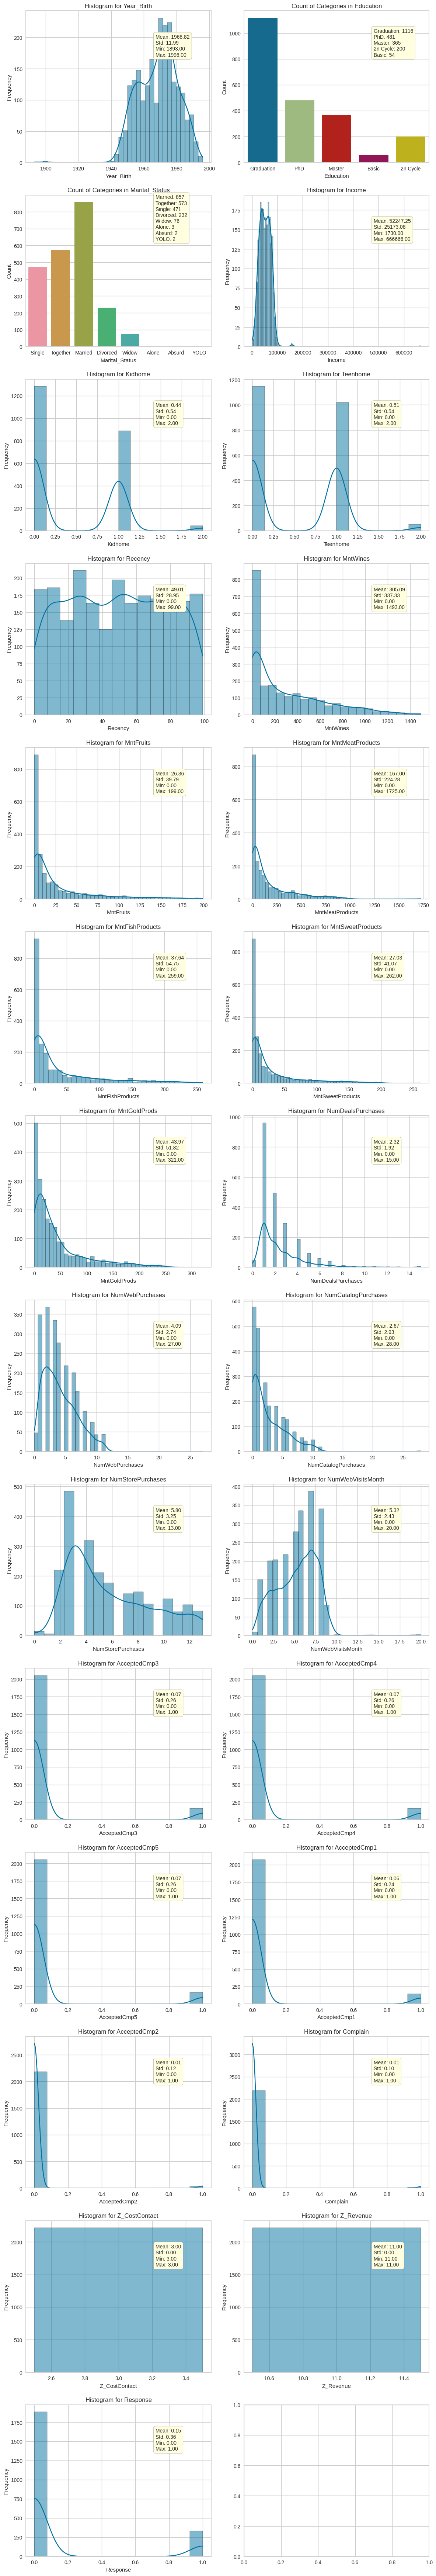

In [9]:
# create plots to visualize the data set, to understand this data set

columns_per_row = 2 # set the number of columns to display in each row
num_rows = (len(df_customer.drop(columns=['ID', 'Dt_Customer']).columns) + columns_per_row - 1) // columns_per_row # calculate the number of rows needed from columns and exclude the Dt_customer (it's the date customer join)

# create subplots
fig, axes = plt.subplots(nrows=num_rows,
                         ncols=columns_per_row,
                         figsize=(12, 5 * num_rows))

# flatten the axes array for easier indexing
axes = axes.flatten()

# loop through columns
for i, column in enumerate(df_customer.drop(columns=['ID', 'Dt_Customer']).columns):
    ax = axes[i]

    # check if the column is numerical or categorical
    if pd.api.types.is_numeric_dtype(df_customer[column]):

        sns.histplot(data=df_customer, x=column, ax=ax, kde=True) # create the histogram plot for numerical columns
        ax.set_title(f'Histogram for {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Frequency')

        # add numerical statistics as an annotation
        stats = df_customer[column].describe()
        stats_text = f"Mean: {stats['mean']:.2f}\nStd: {stats['std']:.2f}\nMin: {stats['min']:.2f}\nMax: {stats['max']:.2f}"
        ax.annotate(stats_text, xy=(0.7, 0.7),
                    xycoords='axes fraction',
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.4",
                              edgecolor="gray",
                              facecolor="lightyellow"))

    else:
        sns.countplot(data=df_customer, x=column, ax=ax) # create a bar plot for categorical columns
        ax.set_title(f'Count of Categories in {column}')
        ax.set_xlabel(column)
        ax.set_ylabel('Count')

        # add value counts as an annotation
        value_counts = df_customer[column].value_counts()
        value_counts_text = '\n'.join([f"{index}: {count}" for index, count in value_counts.items()])
        ax.annotate(value_counts_text, xy=(0.7, 0.7),
                    xycoords='axes fraction',
                    fontsize=10,
                    bbox=dict(boxstyle="round,pad=0.4",
                              edgecolor="gray",
                              facecolor="lightyellow"))

plt.tight_layout() # adjust the layout
plt.show() # show the plots

### Part 2 - Data Preprocessing

### 2.1) Cleaning

First of all, I'd like to focus on the category columns; `Dt_customer`, `Marital_Status`, and `Education`

In [10]:
# check categorical column
cols = df_customer.columns # list all columns
num_cols = df_customer._get_numeric_data().columns

list(set(cols) - set(num_cols)) # differentiate the category column


['Marital_Status', 'Dt_Customer', 'Education']

In [11]:
print(df_customer['Dt_Customer'].head()) # the format date has to changed as well

0    04-09-2012
1    08-03-2014
2    21-08-2013
3    10-02-2014
4    19-01-2014
Name: Dt_Customer, dtype: object


In [12]:
print(max(pd.to_datetime(df_customer["Dt_Customer"])).date())
# the newest date is on 2014-12-06, this data set is about 10 years ago

print(min(pd.to_datetime(df_customer["Dt_Customer"])).date())
# the first date customer join the membership is on 2012-01-08

2014-12-06
2012-01-08


<ipython-input-12-dd67d896906d>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  print(max(pd.to_datetime(df_customer["Dt_Customer"])).date())
<ipython-input-12-dd67d896906d>:4: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  print(min(pd.to_datetime(df_customer["Dt_Customer"])).date())


The newest customer join the memership program is in 2014 and the first customer joined member is 2012. The date needs to be transformed because it will allow us to capture the duration of the relationship with the grocery store in a numeric format. <br>
I'd like to change the date to make it newest date customer join is today (0).

In [13]:
df = df_customer
last_join = date(2014, 12, 6) # last day joining the program
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # change format
df['Customer_join_day'] = pd.to_numeric(df['Dt_Customer'].dt.date.apply(lambda x: (last_join - x)).dt.days).astype('int32') # change from date to number of days customers join and scale all the dates
df['Customer_join_day'].head()

<ipython-input-13-10d03ee02de8>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"]) # change format


0    971
1    125
2    472
3     65
4    321
Name: Customer_join_day, dtype: int32

In [14]:
print('The longest that customer join the membership program:', df['Customer_join_day'].max())
print('The soonest that customer join the membership program:', df['Customer_join_day'].min())

The longest that customer join the membership program: 1063
The soonest that customer join the membership program: 0


Married Status and Education show category type, these need to change to numeric.

In [15]:
print('Married Status:', df['Marital_Status'].unique())
print('Education:', df['Education'].unique())

Married Status: ['Single' 'Together' 'Married' 'Divorced' 'Widow' 'Alone' 'Absurd' 'YOLO']
Education: ['Graduation' 'PhD' 'Master' 'Basic' '2n Cycle']


In [16]:
df['Marital_Status']=df['Marital_Status'].replace({'Married':'couple',
                                                       'Together':'couple',
                                                       'Absurd': 'single',
                                                       'Widow':'single',
                                                       'YOLO':'single',
                                                       'Divorced':'single',
                                                       'Single':'single',
                                                       'Alone':'single'})

df['Education'] = df['Education'].replace({'Basic':'Undergraduate',
                                              '2n Cycle':'Undergraduate',
                                              'Graduation':'Graduate',
                                              'Master':'Graduate',
                                              'PhD':'Graduate'})

print('Married Status:', df['Marital_Status'].unique())
print('Education:', df['Education'].unique())

Married Status: ['single' 'couple']
Education: ['Graduate' 'Undergraduate']


In [17]:
LE_model = LabelEncoder()
df['Marital_Status'] = LE_model.fit_transform(df['Marital_Status'])
df['Education'] = LE_model.fit_transform(df['Education'])

In [18]:
print('Marital_status changes to numeric: ')
print(df['Marital_Status'].head())

print('Education changes to numeric: ')
df['Education'].head()

Marital_status changes to numeric: 
0    1
1    1
2    0
3    0
4    0
Name: Marital_Status, dtype: int64
Education changes to numeric: 


0    0
1    0
2    0
3    0
4    0
Name: Education, dtype: int64

I'd like handle the data set before segmenting customers:  <br>
1) Combine `kidhome` and `teenhome`. <br>
2) Change `Year_Birth` to `age`.  <br>
3) Combine all spending products together. <br>



In [19]:
# change column names and clean values
df['Age'] = 2024-df['Year_Birth'] # from birth year change to age
df['Child'] = df['Kidhome']+df['Teenhome'] # it's redundance so I will combine into one column
df['Spending'] = df['MntWines']+df['MntFruits']+df['MntMeatProducts']+df['MntFishProducts']+df['MntSweetProducts']+df['MntGoldProds']


df=df.rename(columns={'MntWines': 'Wines',
                          'MntFruits': 'Fruits',
                          'MntMeatProducts': 'Meat',
                          'MntFishProducts': 'Fish',
                          'MntSweetProducts': 'Sweets',
                          'MntGoldProds' :'Gold'})

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2216 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2216 non-null   int64         
 1   Year_Birth           2216 non-null   int64         
 2   Education            2216 non-null   int64         
 3   Marital_Status       2216 non-null   int64         
 4   Income               2216 non-null   float64       
 5   Kidhome              2216 non-null   int64         
 6   Teenhome             2216 non-null   int64         
 7   Dt_Customer          2216 non-null   datetime64[ns]
 8   Recency              2216 non-null   int64         
 9   Wines                2216 non-null   int64         
 10  Fruits               2216 non-null   int64         
 11  Meat                 2216 non-null   int64         
 12  Fish                 2216 non-null   int64         
 13  Sweets               2216 non-nul

In [21]:
df.describe()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_join_day,Age,Child,Spending
count,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000,2216.0,2216.0,2216.000000,2216.000000,2216.000000,2216.000000,2216.000000
mean,5588.353339,1968.820397,0.114621,0.354693,52247.251354,0.441787,0.505415,49.012635,305.091606,26.356047,166.995939,37.637635,27.028881,43.965253,2.323556,4.085289,2.671029,5.800993,5.319043,0.073556,0.074007,0.073105,0.064079,0.013538,0.009477,3.0,11.0,0.150271,512.006318,55.179603,0.947202,607.075361
std,3249.376275,11.985554,0.318636,0.478528,25173.076661,0.536896,0.544181,28.948352,337.327920,39.793917,224.283273,54.752082,41.072046,51.815414,1.923716,2.740951,2.926734,3.250785,2.425359,0.261106,0.261842,0.260367,0.244950,0.115588,0.096907,0.0,0.0,0.357417,232.469034,11.985554,0.749062,602.900476
min,0.000000,1893.000000,0.000000,0.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,0.000000,28.000000,0.000000,5.000000
25%,2814.750000,1959.000000,0.000000,0.000000,35303.000000,0.000000,0.000000,24.000000,24.000000,2.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,340.000000,47.000000,0.000000,69.000000
50%,5458.500000,1970.000000,0.000000,0.000000,51381.500000,0.000000,0.000000,49.000000,174.500000,8.000000,68.000000,12.000000,8.000000,24.500000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,513.000000,54.000000,1.000000,396.500000
75%,8421.750000,1977.000000,0.000000,1.000000,68522.000000,1.000000,1.000000,74.000000,505.000000,33.000000,232.250000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000,686.000000,65.000000,1.000000,1048.000000
max,11191.000000,1996.000000,1.000000,1.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,262.000000,321.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000,1063.000000,131.000000,3.000000,2525.000000


### 2.2) Detect Outlier

Outliers can drastically change the results of the prediction/ segmentation, I will handle the outlier by ploting boxplot. <br>

Boxplot, income shows one outlier, around `$600,0000`, as well as age that shows elderly customer over 120 years old around 3 customers. <br>

In [22]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Customer_join_day,Age,Child,Spending
0,5524,1957,0,1,58138.0,0,0,2012-04-09,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,971,67,0,1617
1,2174,1954,0,1,46344.0,1,1,2014-08-03,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,125,70,2,27
2,4141,1965,0,0,71613.0,0,0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,472,59,0,776
3,6182,1984,0,0,26646.0,1,0,2014-10-02,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,65,40,1,53
4,5324,1981,0,0,58293.0,1,0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,321,43,1,422


(array([1, 2]), [Text(1, 0, 'Recency'), Text(2, 0, 'Age')])

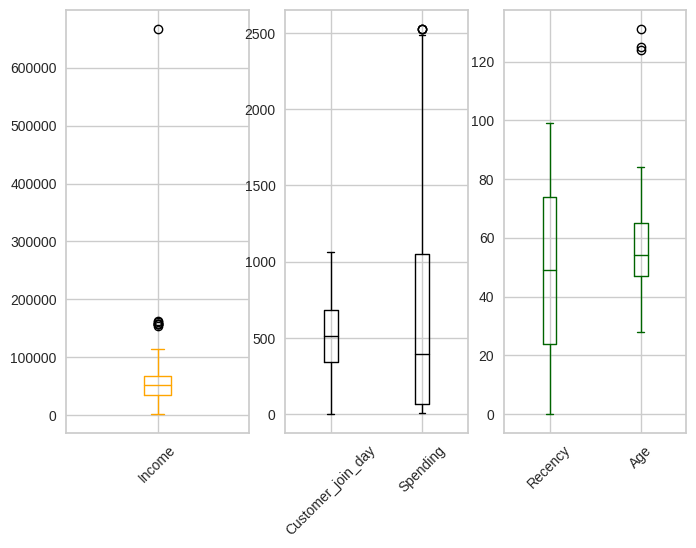

In [23]:
plt.subplot(1, 3, 1)
pd.DataFrame(df['Income']).boxplot(color='orange')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
df_cus_spending = pd.DataFrame(df, columns = ['Customer_join_day', 'Spending'])
df_cus_spending.boxplot(color='black')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
df_recency_age = pd.DataFrame(df, columns = ['Recency', 'Age'])
df_recency_age.boxplot(color='darkgreen')
plt.xticks(rotation=45)

Removing outlier by using interquartile range (IQR) technique as following steps: <br>
Step 1 - calculate the IQR. <br>
Step 2 - define thresholds.  <br>
Step 3 - identify and remove outliers.  <br>

In [24]:
# detect outliers of income
Q1 = df['Income'].quantile(0.25) # calculate the IQR
Q3 = df['Income'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - (2 * IQR) # define thresholds
upper_threshold = Q3 + (2 * IQR)
print(f'Consider as income outliers if out of range: {lower_threshold} and {upper_threshold}')

df = df[(df['Income'] >= lower_threshold) & (df['Income'] <= upper_threshold)] # identify and remove outliers


# detect outliers of age
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1

lower_threshold = Q1 - (2 * IQR)
upper_threshold = Q3 + (2 * IQR)
print(f'Consider as age outliers if out of range: {lower_threshold} and {upper_threshold}')

df = df[(df['Age'] >= lower_threshold) & (df['Age'] <= upper_threshold)] # identify and remove outliers

print(f"Filtered Data Size: {df.shape[0]} rows")

Consider as income outliers if out of range: -31135.0 and 134960.0
Consider as age outliers if out of range: 11.0 and 101.0
Filtered Data Size: 2205 rows


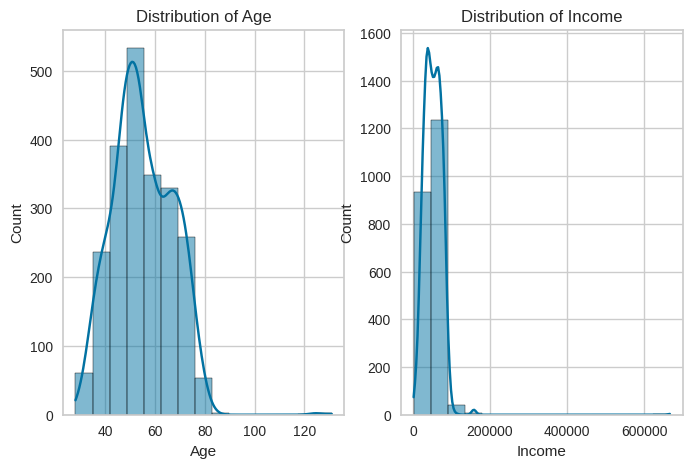

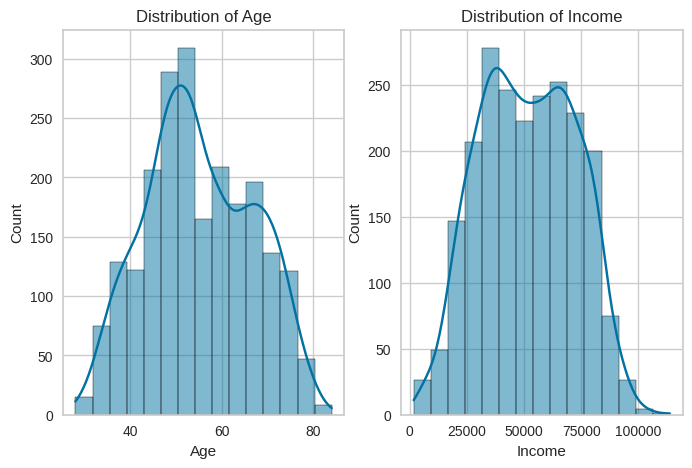

In [25]:
plt.figure(figsize=(8, 5))

# plot for Age
plt.subplot(1, 2, 1)
sns.histplot(df_customer['Age'], kde=True, bins=15)
plt.title('Distribution of Age')

# plot for Income
plt.subplot(1, 2, 2)
sns.histplot(df_customer['Income'], kde=True, bins=15)
plt.title('Distribution of Income')
plt.show()

plt.figure(figsize=(8, 5))
# plot for Age
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=15)
plt.title('Distribution of Age')

# plot for Income
plt.subplot(1, 2, 2)
sns.histplot(df['Income'], kde=True, bins=15)
plt.title('Distribution of Income')

plt.show()

### 2.3) Drop insignificant columns <br>
1) ID , Z_CostContact , and Z_Revenue are not giving anything about segmenting customers. <br>

2) Kidhome and Teenhome are combined into one single column. <br>
3) Dt_customer transforms to Customer_join_day. <br>
4) AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Response are dropped and I will analyze the customers based on campaign acceptance later. <br>
5) Camplain is dropped as well, to focus on the income, spending, and Demographics. <br>
6) NumDealsPurchases, NumWebPurchases, NumWebVisitsMonth, NumCatalogPurchases, NumStorePrchases

In [26]:
data = df # copy the new data frame

col_to_del = ['ID',
              'Year_Birth',
              'Kidhome',
              'Teenhome',
              'Dt_Customer',
              'AcceptedCmp3',
              'AcceptedCmp4',
              'AcceptedCmp5',
              'AcceptedCmp1',
              'AcceptedCmp2',
              'Complain',
              'Response',
              'NumDealsPurchases',
              'NumWebPurchases',
              'NumWebVisitsMonth',
              'NumCatalogPurchases',
              'NumStorePurchases',
              'Z_CostContact',
              'Z_Revenue',
              ] # drop the columns first and will analyze the deal customers tend to accept and which groups
data = data.drop(col_to_del, axis=1)

### 2.4) Scalling
In this work, I'll use MinMaxScaler to scale the data point, it doesn’t reduce the effect of outliers, but it linearily scales them down into a fixed range, where the largest occuring data point corresponds to the maximum value will be one and the smallest one corresponds to the minimum value will be zero

In [27]:
from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
scaler = MinMaxScaler()
new_data = scaler.fit_transform(data)
new_data = pd.DataFrame(new_data,columns= data.columns)

In [28]:
new_data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_join_day,Age,Child,Spending
0,0.0,1.0,0.503625,0.585859,0.425318,0.442211,0.316522,0.664093,0.335878,0.274143,0.913452,0.696429,0.000000,0.639683
1,0.0,1.0,0.398325,0.383838,0.007368,0.005025,0.003478,0.007722,0.003817,0.018692,0.117592,0.750000,0.666667,0.008730
2,0.0,0.0,0.623933,0.262626,0.285332,0.246231,0.073623,0.428571,0.080153,0.130841,0.444026,0.553571,0.000000,0.305952
3,0.0,0.0,0.222456,0.262626,0.007368,0.020101,0.011594,0.038610,0.011450,0.015576,0.061148,0.214286,0.333333,0.019048
4,0.0,0.0,0.505009,0.949495,0.115874,0.216080,0.068406,0.177606,0.103053,0.046729,0.301976,0.267857,0.333333,0.165476


compare the original data and data after scalling, we can see that it gives us the same scalling but smaller range


Text(0.5, 1.0, 'Income after scalling')

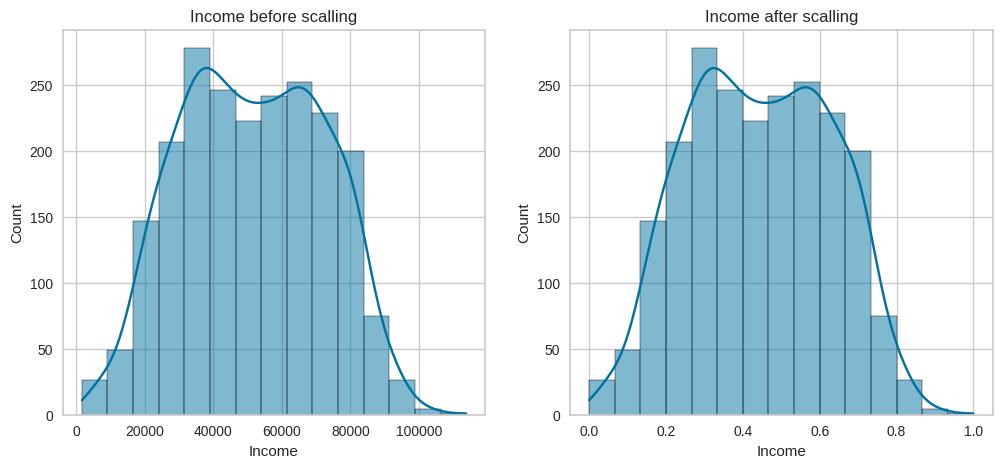

In [29]:
print("compare the original data and data after scalling, we can see that it gives us the same scalling but smaller range")
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(data['Income'], kde=True, bins=15)
plt.title('Income before scalling')

plt.subplot(1, 2, 2)
sns.histplot(new_data['Income'], kde=True, bins=15)
plt.title('Income after scalling')

### Check correlation if there is any multicolinearlity occur:

The correlation matrix looks good, no strong relationship between the artribute.

In [30]:
new_data.corr()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_join_day,Age,Child,Spending
Education,1.000000,-0.022298,-0.170874,-0.007603,-0.154688,-0.006723,-0.091900,0.026016,0.026298,-0.014341,0.066026,-0.150071,-0.047737,-0.117542
Marital_Status,-0.022298,1.000000,0.012405,-0.000364,0.007418,0.026955,0.031981,0.018132,0.015960,0.026187,-0.000204,-0.003800,-0.042856,0.022514
Income,-0.170874,0.012405,1.000000,0.006716,0.730495,0.537920,0.702500,0.551758,0.555601,0.417653,-0.031207,0.212625,-0.350313,0.823770
Recency,-0.007603,-0.000364,0.006716,1.000000,0.016470,-0.004909,0.026138,0.001177,0.025535,0.018558,0.033604,0.014228,0.018566,0.021824
Wines,-0.154688,0.007418,0.730495,0.016470,1.000000,0.384947,0.593119,0.395967,0.388613,0.390194,0.149266,0.164438,-0.355922,0.897262
Fruits,-0.006723,0.026955,0.537920,-0.004909,0.384947,1.000000,0.568100,0.592556,0.570986,0.392596,0.059861,0.013149,-0.396954,0.614464
Meat,-0.091900,0.031981,0.702500,0.026138,0.593119,0.568100,1.000000,0.595673,0.556511,0.375581,0.068645,0.041540,-0.513629,0.856838
Fish,0.026016,0.018132,0.551758,0.001177,0.395967,0.592556,0.595673,1.000000,0.582974,0.425420,0.078186,0.040855,-0.429466,0.644453
Sweets,0.026298,0.015960,0.555601,0.025535,0.388613,0.570986,0.556511,0.582974,1.000000,0.355747,0.076714,0.021075,-0.391121,0.609244
Gold,-0.014341,0.026187,0.417653,0.018558,0.390194,0.392596,0.375581,0.425420,0.355747,1.000000,0.146236,0.059295,-0.269869,0.529845


### Dimension Reduction
In this customer segmentation, there are several attributes, and it's challenging to segment customers into groups. <br>

**PCA** comes in handy, it is unsupervised linear transformation technique and it's one of the simpliest and most fundamental dimensionality reduction techniques.

Text(0, 0.5, 'cumulative explained variance ratio')

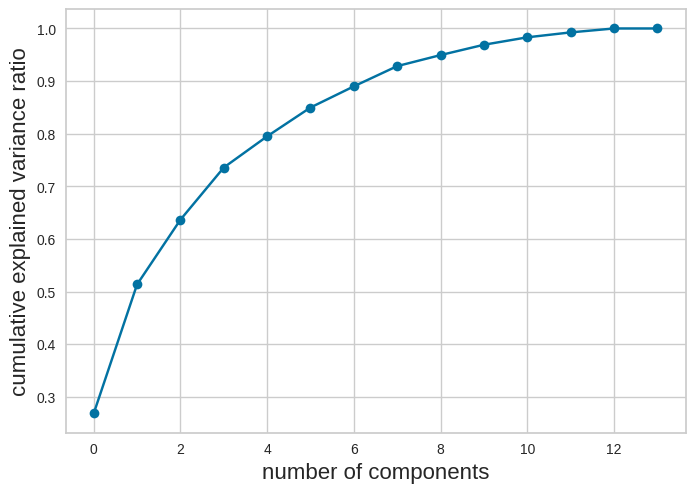

In [31]:
model = PCA().fit(new_data)
plt.plot(np.cumsum(model.explained_variance_ratio_), marker='o')
plt.xlabel('number of components', fontsize=16)
plt.ylabel('cumulative explained variance ratio', fontsize=16)

How do we know the number of components, we should select? <br>
Cumulative explained variance accurately select the right number of principal components as it represents much information ([Rukshan Pramoditha
](https://towardsdatascience.com/how-to-select-the-best-number-of-principal-components-for-the-dataset-287e64b14c6d)) <br>
A particular threshold of 80% explained variance is universally applicable. The plot shows 6 components are able to explain the variance about 82.5%.

In [32]:
# set threshold to 0.8 (80%)
model = PCA(n_components=0.8).fit(new_data)
print('number of components:', model.n_components_)
column = []
for i in range(model.n_components_):
  column.append("column" + str(i+1))

pca_result = pd.DataFrame(model.transform(new_data), columns=(column))
pca_result.describe().T

number of components: 6


,count,mean,std,min,25%,50%,75%,max
column1,2205.0,-1.047285e-17,0.481322,-0.576950,-0.433336,-0.197907,0.477935,1.041948
column2,2205.0,1.208406e-17,0.460109,-0.889761,-0.324011,-0.105326,0.345150,1.466280
column3,2205.0,-3.061295e-17,0.325862,-0.406123,-0.168303,-0.101656,-0.022399,1.079526
column4,2205.0,3.685638e-17,0.292614,-0.535593,-0.253550,0.004858,0.249786,0.567076
column5,2205.0,2.739054e-17,0.226285,-0.630875,-0.154378,-0.006600,0.150128,0.867249
column6,2205.0,-3.131786e-17,0.217404,-0.669919,-0.154952,0.002484,0.157330,0.672249


<ipython-input-33-0658270e1409>:5: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  sc = ax.scatter(pca_result['column1'], pca_result['column2'], pca_result['column3'], c='pink', cmap='viridis', marker='o', s=50)


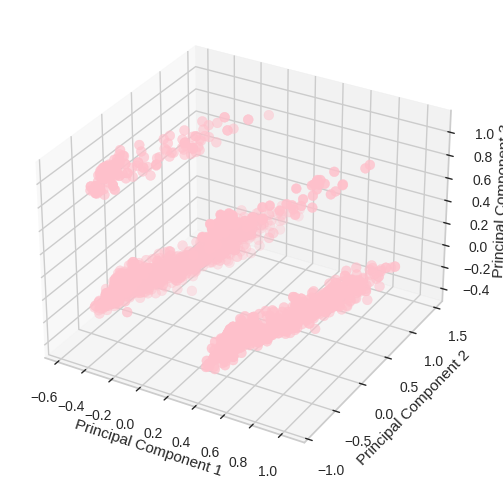

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# scatter plot with PCA components, use color or size for the fourth dimension
sc = ax.scatter(pca_result['column1'], pca_result['column2'], pca_result['column3'], c='pink', cmap='viridis', marker='o', s=50)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')

plt.show()

### Part 3 - Segment customers <br>

Using **the elbow method** to find the ideal number of clusters. <br>
Then apply **k-means** with different number of clusters. <br>
We can study the relationship between error/loss of clustering and the number of clusters.


Select the number of clusters is subjective. In my opinion, 5 seems to be a good number, it has no significant difference after 5 clustering.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

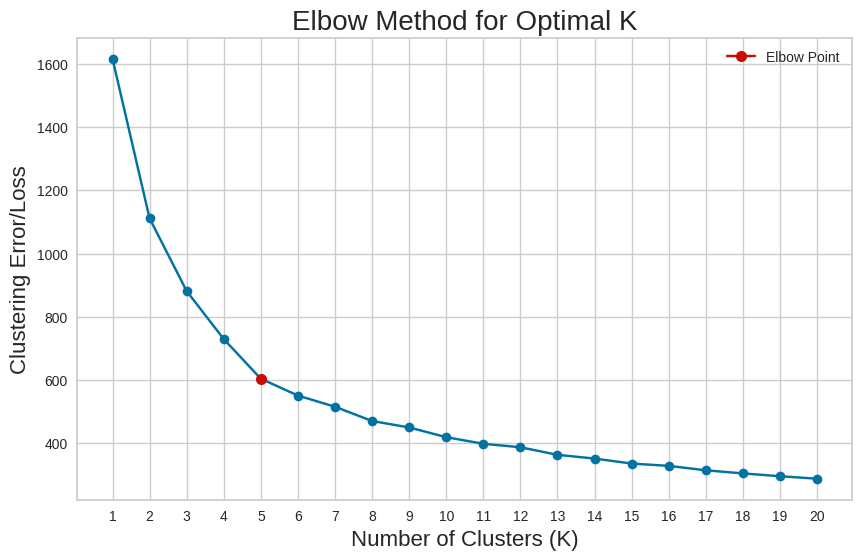

In [34]:
error_list = []
for K in range(1, 21):
    model = KMeans(n_clusters=K, random_state=0)
    model.fit(pca_result)
    error_list.append(model.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(range(1, 21), error_list, marker='o', linestyle='-', color='b') # use a line plot with markers for better visibility
elbow_point = 5  # highlight the elbow point (where the curve starts to bend)
ax.plot(elbow_point, error_list[elbow_point - 1], marker='o', markersize=8, color='r', label='Elbow Point')

ax.set_title('Elbow Method for Optimal K', fontsize=20)
ax.set_xlabel('Number of Clusters (K)', fontsize=16)
ax.set_ylabel('Clustering Error/Loss', fontsize=16)
ax.set_xticks(range(1, 21))
ax.legend()

plt.show()

In [35]:
model = KMeans(n_clusters = 5, random_state = 0)
model.fit(pca_result) # run the algorithm
label = model.predict(pca_result) # get the cluster label of each customer
new_data['label'] = label # add label to be a new column in the data set
data['label'] = label # add label to be a new column in the data set
center = model.cluster_centers_ # get the 4 centers
center

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([[-0.13986798,  0.64109686, -0.06419085, -0.0125379 ,  0.0087306 ,
        -0.00217949],
       [ 0.50231031, -0.50654788, -0.13231822, -0.01841777, -0.00633837,
         0.01647094],
       [-0.43045918, -0.14617221, -0.1483277 , -0.0039716 , -0.02376043,
         0.01776811],
       [-0.17906973, -0.21902951,  0.86715505,  0.04534837,  0.0808611 ,
        -0.08551807],
       [ 0.79623947,  0.29079365,  0.01350745,  0.02092434, -0.00324628,
        -0.00149617]])

Groups 0 and 1 have almost the same size, each comprising approximately 400-450 customers. In contrast, Group 2 has the highest number of customers about 800, while Group 3 has the fewest around 220 customers.

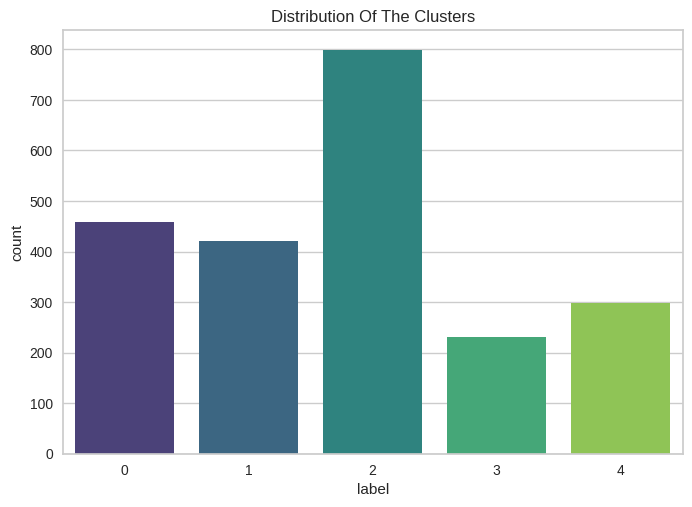

In [36]:
pl = sns.countplot(x = new_data["label"], palette = 'viridis')
pl.set_title("Distribution Of The Clusters")
plt.show()

Let's take a look of income versus spending <br>

The scatter plot shows variable on income and spending on different groups. <br>
**Group 0** - tend to have the high income and high spending <br>
**Group 1** - low income, low spending <br>
**Group 2** - low income, low spending <br>
**Group 3** - low income, low spending <br>
**Group 4** - high income, high spending <br>

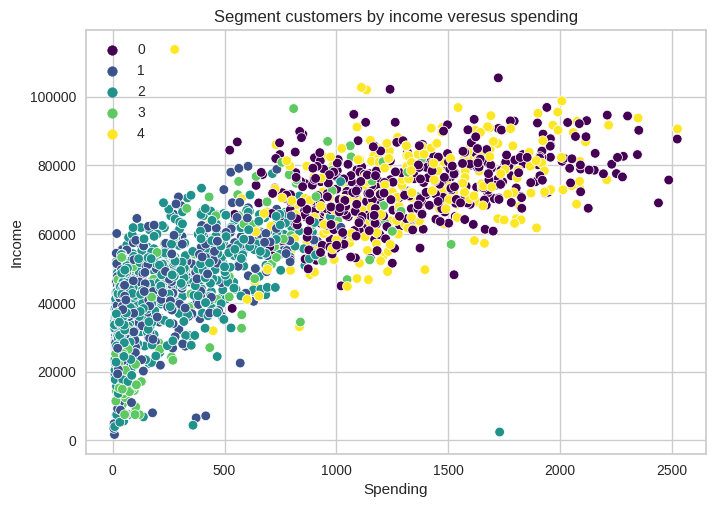

In [37]:
plot_income_spending = sns.scatterplot(data = data,
                                       x = data["Spending"],
                                       y = data["Income"],
                                       hue = data['label'],
                                       palette = 'viridis')

plot_income_spending.set_title("Segment customers by income veresus spending")
plt.legend()
plt.show()

**Customer behavior segment on income, age, and spending** <br>
Group 0 - Medium income/ Mature age/ Low spending <br>
Group 1 - High income/ Mature age/ Medium Spend <br>
Group 2 - Low income/ Young age/ Low Spend <br>
Group 3 - High income/ Mature age/ High Spend <br>
Group 4 - Low income/ Mature age/ Low Spend <br>

Based on the income, age, and spending group 1 is the target that the retail should focus because they have the potential to spend more.

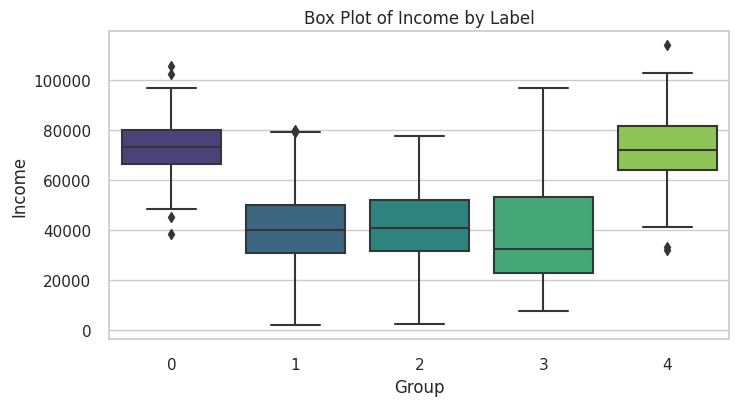

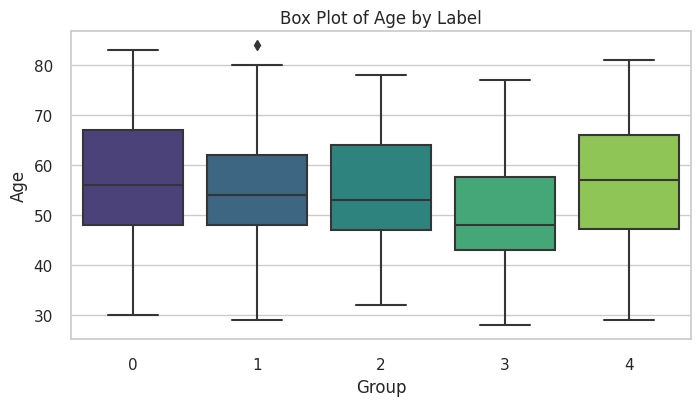

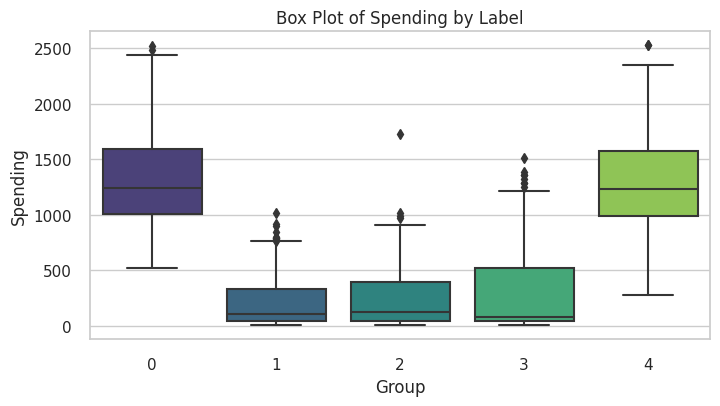

In [38]:
sns.set(style="whitegrid")

# Create a box plot for 'Income' by 'label'
plt.figure(figsize=(8, 4))
sns.boxplot(x = 'label',
            y = 'Income',
            data = data,
            palette = 'viridis')
plt.title('Box Plot of Income by Label')
plt.xlabel('Group')
plt.ylabel('Income')
plt.show()

# Create a box plot for 'Age' by 'label'
plt.figure(figsize=(8, 4))
sns.boxplot(x = 'label',
            y = 'Age',
            data = data,
            palette = 'viridis')
plt.title('Box Plot of Age by Label')
plt.xlabel('Group')
plt.ylabel('Age')
plt.show()

# Create a box plot for 'Age' by 'label'
plt.figure(figsize=(8, 4))
sns.boxplot(x = 'label',
            y = 'Spending',
            data = data,
            palette = 'viridis')
plt.title('Box Plot of Spending by Label')
plt.xlabel('Group')
plt.ylabel('Spending')
plt.show()

In [39]:
data.head()

,Education,Marital_Status,Income,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,Customer_join_day,Age,Child,Spending,label
0,0,1,58138.0,58,635,88,546,172,88,88,971,67,0,1617,4
1,0,1,46344.0,38,11,1,6,2,1,6,125,70,2,27,1
2,0,0,71613.0,26,426,49,127,111,21,42,472,59,0,776,0
3,0,0,26646.0,26,11,4,20,10,3,5,65,40,1,53,2
4,0,0,58293.0,94,173,43,118,46,27,15,321,43,1,422,2


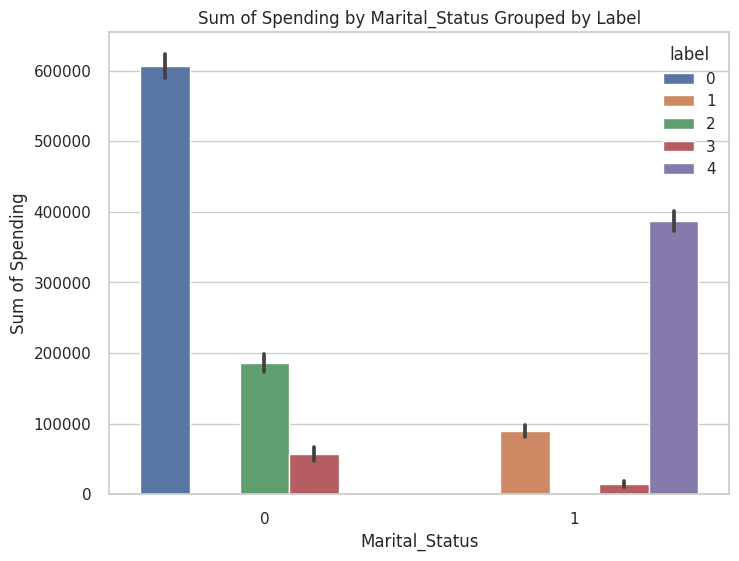

In [40]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Marital_Status', y='Spending', hue='label', estimator=sum)
plt.title('Sum of Spending by Marital_Status Grouped by Label')
plt.xlabel('Marital_Status')
plt.ylabel('Sum of Spending')
plt.show()

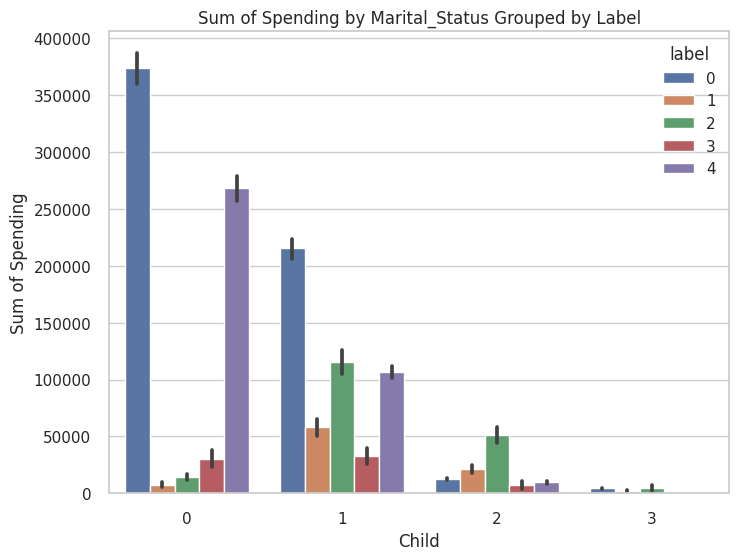

In [41]:
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Child', y='Spending', hue='label', estimator=sum)
plt.title('Sum of Spending by Marital_Status Grouped by Label')
plt.xlabel('Child')
plt.ylabel('Sum of Spending')
plt.show()

In [42]:
data.columns

Index(['Education', 'Marital_Status', 'Income', 'Recency', 'Wines', 'Fruits',
       'Meat', 'Fish', 'Sweets', 'Gold', 'Customer_join_day', 'Age', 'Child',
       'Spending', 'label'],
      dtype='object')

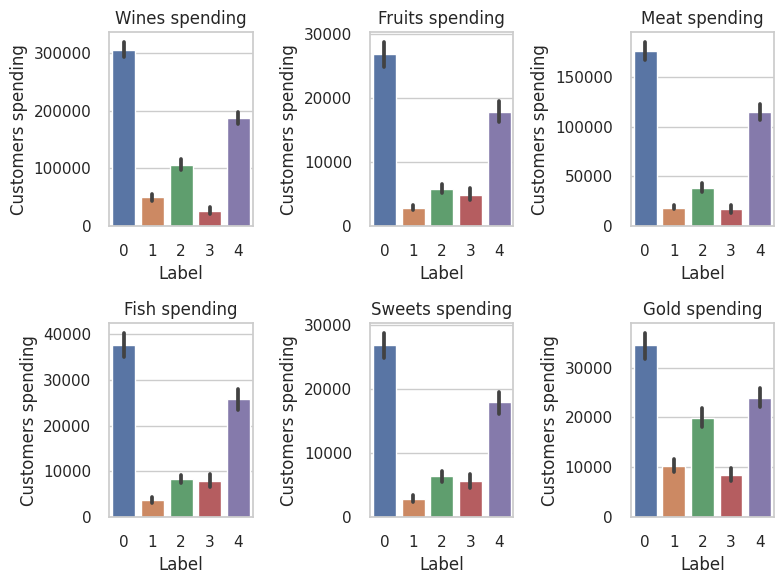

In [43]:
plt.figure(figsize=(8, 6))
column = ['Wines', 'Fruits','Meat', 'Fish', 'Sweets', 'Gold']
for i, col in enumerate(column, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=data, x='label', y=col, estimator=sum)
    plt.title(f'{col} spending')
    plt.xlabel('Label')
    plt.ylabel(f'Customers spending')

plt.tight_layout()
plt.show()

Part 5 - Analyze campaign for customers

For campaign, the graph below shows sum of number customers accepted campaign. that retail store offer to customers. <br>

Campaigns 3, 4, and 5 exhibit high potential, attracting approximately 160 customers each. Following closely is Campaign 1, with around 140 customer acceptances. However, a notable difference is observed in Campaign 2, where only 30 customers accepted the offer. <br>

This discrepancy suggests that the retail store should closely examine the offerings in Campaigns 3, 4, and 5, as they demonstrate a higher likelihood of success. Conversely, attention should be paid to Campaign 2, where the lower acceptance rate indicates a potential area for improvement

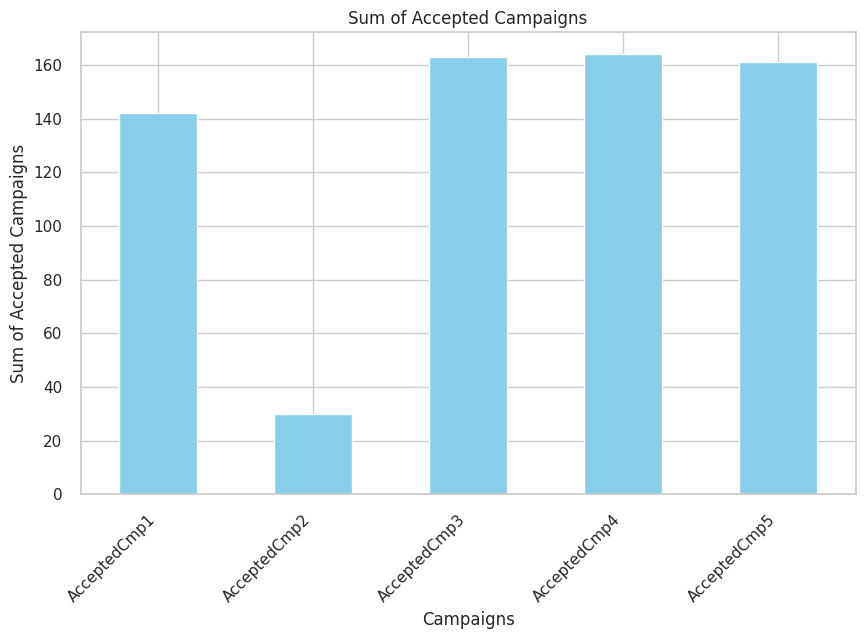

In [44]:
columns_to_sum = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']

# plot the bar plot
plt.figure(figsize=(10, 6))
df[columns_to_sum].sum().plot(kind='bar', color='skyblue')
plt.title('Sum of Accepted Campaigns')
plt.xlabel('Campaigns')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of Accepted Campaigns')
plt.show()

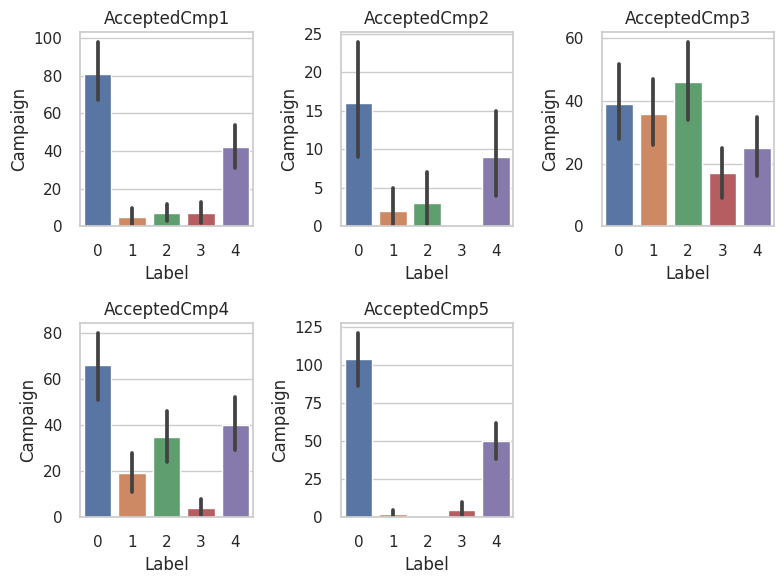

In [54]:
df['label'] = label # add label to df data frame


plt.figure(figsize=(8, 6))
column = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
for i, col in enumerate(column, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=df, x='label', y=col, estimator=sum)
    plt.title(f'{col}')
    plt.xlabel('Label')
    plt.ylabel(f'Campaign')

plt.tight_layout()
plt.show()

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2205 entries, 0 to 2239
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2205 non-null   int64         
 1   Year_Birth           2205 non-null   int64         
 2   Education            2205 non-null   int64         
 3   Marital_Status       2205 non-null   int64         
 4   Income               2205 non-null   float64       
 5   Kidhome              2205 non-null   int64         
 6   Teenhome             2205 non-null   int64         
 7   Dt_Customer          2205 non-null   datetime64[ns]
 8   Recency              2205 non-null   int64         
 9   Wines                2205 non-null   int64         
 10  Fruits               2205 non-null   int64         
 11  Meat                 2205 non-null   int64         
 12  Fish                 2205 non-null   int64         
 13  Sweets               2205 non-nul

The bar plot below illustrates customer purchasing frequencies on the website, catalog, and in-store. <br>

Group 2 displays a preference for website shopping, with around 5,000 monthly visiting, purchased in-store at approximately 3,500, followed by website around 1,400 and catalog at 900 times.<br>

Group 0 exhibits a preference for in-store shopping (4,000 times over two years), followed by website purchases (2,550 times) and catalog transactions (2,500 times).<br>

Group 1 predominantly chooses in-store purchases, with almost 2,000 transactions, followed by 1,400 times on the website, and around 500 times through the catalog.<br>

Group 3 engages less frequently, favoring in-store purchases around 1,000 times, website transactions at 750 times, and catalog transactions at 400.<br>

Group 4 most frequently purchases in-store, with approximately 2,500 transactions, and about 1,600 each on catalog and website.<br>

Suggestion: Retailers should pay attention to Group 2, which frequents the website. In-store shopping remains popular, particularly for Group 0 and 2, who also make website purchases. Catalog shopping is favored by Group 0 and 4. **While investing in physical stores may yield benefits due to more frequent in-store purchases**, it's essential to consider the data's age and potential shifts in consumer behavior, especially across different generations. This recommendation is based on the provided data.

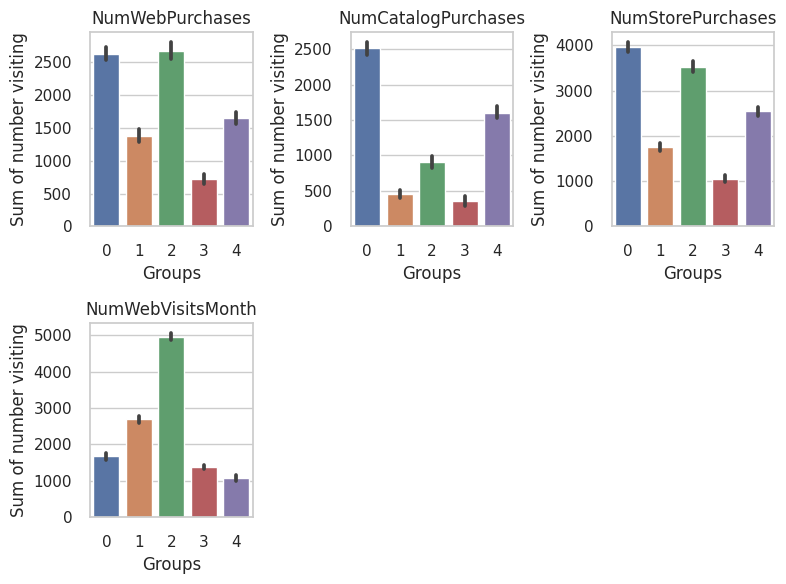

In [68]:
column_place = ['NumWebPurchases',
          'NumCatalogPurchases',
          'NumStorePurchases',
          'NumWebVisitsMonth']

plt.figure(figsize=(8, 6))
for i, col in enumerate(column_place, 1):
    plt.subplot(2, 3, i)
    sns.barplot(data=df, x='label', y=col, estimator=sum)
    plt.title(f'{col}')
    plt.xlabel('Groups')
    plt.ylabel('Sum of number visiting')

plt.tight_layout() # help arrange plots
plt.show()

### Customer Segmentations <br>
**Group 0:** <br>

*General:* This segment comprises individuals with high incomes, mature ages, and a propensity for high spending.<br>
*Relationship:* They are predominantly single and exhibit the highest spending behavior, particularly when without children.<br>
*Products:* Notably, their preferences lean towards wine, and they demonstrate a higher propensity.<br>
*Campaign:* They tend to accept Campaigns 5 and 1.<br>

**Group 1:** <br>

*General:* Individuals in this group exhibit lower incomes, mature ages, and conservative spending habits.<br>
*Relationship:* Most are in relationships and tend to allocate spending towards wine, meat, and gold. <br>
*Products:* Notably, they show a preference for Campaign 3. <br>
*Campaign:* They exhibit a preference for Campaign 3. <br>

**Group 2:** <br>

*General:* This segment consists of individuals with low incomes, mature ages, and conservative spending tendencies.<br>
*Relationship:* The majority are single, and their highest spending occurs when they have a single child.<br>
*Products:* Their spending patterns are directed towards wine, meat, and gold.<br>
*Campaign:* They exhibit a higher likelihood of accepting Campaigns 3 and 4.<br>

**Group 3:** <br>

*General:* Individuals with medium incomes, younger ages, and moderate spending habits form this group. <br>
*Relationship:* Predominantly single, their highest spending occurs when they have child. <br>
*Products:* They favor spending on fish and gold, with a lesser emphasis on wine. <br>
*Campaign:* Additionally, there is a tendency to accept Campaign 3.<br>

**Group 4:** <br>

*General:* This segment represents individuals with high incomes, mature ages, and a predisposition for high spending, primarily when without children.<br>
*Relationship:* Those in relationships allocate spending notably towards wine.<br>
*Products:* They tend to spend on every products but more on wine and meat. <br>
*Campaign:* They exhibit a particular interest in accepting Campaigns 1 and 4.<br>


**Campaign** <br>
Campaigns 3, 4, and 5 exhibit high potential, attracting approximately 160 customers each. Following closely is Campaign 1, with around 140 customer acceptances. However, a notable difference is observed in Campaign 2, where only 30 customers accepted the offer.<br>

This discrepancy suggests that the retail store should closely examine the offerings in Campaigns 3, 4, and 5, as they demonstrate a higher likelihood of success. Conversely, attention should be paid to Campaign 2, where the lower acceptance rate indicates a potential area for improvement<br>






### Part 5 Conclusion <br>
- Most of our customers spend on wine the most, then second product customer spend on meat. Customer group 0 and 5 have high income and high spending, they can consider as VIP customers.
- Campaign 3, 4, and 5 are successful as the campaigns have a positive response from customers, customers have no attention to campaign 2. The retailer should analyze in details of these campaigns.
-  Retailers should pay attention to Group 2, which frequents the website. In-store shopping remains popular, particularly for Group 0 and 2, who also make website purchases. Catalog shopping is favored by Group 0 and 4. **While investing in physical stores may yield benefits due to more frequent in-store purchases**, it's essential to consider the data's age and potential shifts in consumer behavior, especially across different generations. This recommendation is based on the provided data.